In [1]:
import numpy as np
import numpy.random as rnd
import time
import pylab as plt

In [2]:
#Length of match
match_minutes = 90
#Average goals per match
goals_per_match = 2.79

#Probability of a goal per minute
prob_per_minute = np.array(goals_per_match/match_minutes)
print('The probability of a goal per minute is %5.5f. \n' % prob_per_minute )

The probability of a goal per minute is 0.03100. 



In [3]:
#Count of the number of goals
goals=0

for minute in range(match_minutes):

  #Generate a random number between 0 and 1.
  r=rnd.rand(1,1)

  #Prints an X when there is a goal and a zero otherwise.
  if (r < prob_per_minute):
    #Goal - if the random number is less than the goal probability.
    print('X', end = ' ')
    goals=goals+1
    time.sleep(1)  #Longer pause
  else:
    print('o', end = ' ')
    time.sleep(0.1)  #Short pause
print('\n')
print('Final whistle. \n \nThere were ' + str(goals) + ' goals.')

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o 

Final whistle. 
 
There were 3 goals.


In [4]:
# we now simulate 380 matches of a football season and look at how well it predicts the distribution of the number of goals. 
# we loop over 380 matchesstore the number of goals for each match in array and then we make a histogram of the number of goals.

def simulateMatch(n, p):
  # n - number of time units
  # p - probability per time unit of a goal

  # Count the number of goals
  goals = 0

  for minute in range(n):
      # Generate a random number between 0 and 1.
      r = rnd.rand(1, 1)
      # Prints an X when there is a goal and a zero otherwise.
      if (r < p):
        # Goal - if the random number is less than the goal probability.
        goals = goals + 1

  return goals

# Number of matches
num_matches = 380

# Loop over all the matches and print the number of goals.
goals = np.zeros(num_matches)
for i in range(num_matches):
  goals[i] = simulateMatch(match_minutes, prob_per_minute)
  print('In match ' + str(i+1) + ' there were ' + str(int(goals[i])) + ' goals.')

In match 1 there were 5 goals.
In match 2 there were 1 goals.
In match 3 there were 0 goals.
In match 4 there were 0 goals.
In match 5 there were 5 goals.
In match 6 there were 3 goals.
In match 7 there were 5 goals.
In match 8 there were 2 goals.
In match 9 there were 4 goals.
In match 10 there were 6 goals.
In match 11 there were 2 goals.
In match 12 there were 4 goals.
In match 13 there were 5 goals.
In match 14 there were 1 goals.
In match 15 there were 2 goals.
In match 16 there were 2 goals.
In match 17 there were 3 goals.
In match 18 there were 2 goals.
In match 19 there were 2 goals.
In match 20 there were 8 goals.
In match 21 there were 7 goals.
In match 22 there were 2 goals.
In match 23 there were 2 goals.
In match 24 there were 1 goals.
In match 25 there were 1 goals.
In match 26 there were 4 goals.
In match 27 there were 2 goals.
In match 28 there were 4 goals.
In match 29 there were 7 goals.
In match 30 there were 0 goals.
In match 31 there were 2 goals.
In match 32 there

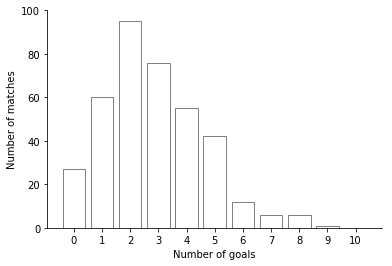

In [5]:
 # Create a histogram

fig, ax = plt.subplots(num=1)

histogram_range = np.arange(-0.5, 10.51, 1)
histogram_goals = np.histogram(goals, histogram_range)

ax.bar(histogram_goals[1][:-1] + 0.5, histogram_goals[0], color='white', edgecolor='black', linestyle='-', alpha=0.5)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0, 11, step=1))
ax.set_yticks(np.arange(0, 101, step=20))
ax.set_xlabel('Number of goals')
ax.set_ylabel('Number of matches')
plt.show()

In [169]:
# importing the tools required for the Poisson regression model

import pandas as pd
import numpy as np
from scipy.stats import poisson,skellam

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn

In [170]:
df_shots = pd.read_csv('../data/Assignment 3/Understat/shots_epl_20-21.csv')

df_shots['h_team'].replace('Manchester United','Man United',inplace=True)
df_shots['h_team'].replace('Newcastle United','Newcastle',inplace=True)
df_shots['h_team'].replace('Manchester City','Man City',inplace=True)
df_shots['h_team'].replace('Wolverhampton Wanderers','Wolves',inplace=True)
df_shots['h_team'].replace('West Bromwich Albion','West Brom',inplace=True)

df_shots['a_team'].replace('Manchester United','Man United',inplace=True)
df_shots['a_team'].replace('Newcastle United','Newcastle',inplace=True)
df_shots['a_team'].replace('Manchester City','Man City',inplace=True)
df_shots['a_team'].replace('Wolverhampton Wanderers','Wolves',inplace=True)
df_shots['a_team'].replace('West Bromwich Albion','West Brom',inplace=True)

df_shots.head(22)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,424175.0,3.0,BlockedShot,0.792,0.675,0.023008,Martin Odegaard,h,2517.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass
1,424176.0,5.0,MissedShots,0.714,0.493,0.018891,Thomas Partey,h,2328.0,OpenPlay,2020.0,RightFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Granit Xhaka,Pass
2,424177.0,5.0,SavedShot,0.688,0.435,0.014004,Granit Xhaka,h,204.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Calum Chambers,Pass
3,424178.0,6.0,BlockedShot,0.772,0.359,0.018026,Nicolas Pepe,h,5656.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Pierre-Emerick Aubameyang,Pass
4,424179.0,9.0,BlockedShot,0.787,0.642,0.023655,Martin Odegaard,h,2517.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass
5,424180.0,23.0,MissedShots,0.953,0.569,0.146352,Pierre-Emerick Aubameyang,h,318.0,OpenPlay,2020.0,OtherBodyPart,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Martin Odegaard,Cross
6,424181.0,26.0,SavedShot,0.813,0.729,0.017914,Thomas Partey,h,2328.0,OpenPlay,2020.0,RightFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Pierre-Emerick Aubameyang,Pass
7,424182.0,26.0,BlockedShot,0.689,0.457,0.017331,Granit Xhaka,h,204.0,FromCorner,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass
8,424183.0,28.0,SavedShot,0.727,0.299,0.035846,Granit Xhaka,h,204.0,DirectFreekick,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,NaN,Standard
9,424186.0,43.0,ShotOnPost,0.910,0.603,0.013912,Gabriel,h,5613.0,FromCorner,2020.0,Head,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Granit Xhaka,Aerial


In [171]:
df_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9235 entries, 0 to 9234
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9235 non-null   float64
 1   minute           9235 non-null   float64
 2   result           9235 non-null   object 
 3   X                9235 non-null   float64
 4   Y                9235 non-null   float64
 5   xG               9235 non-null   float64
 6   player           9235 non-null   object 
 7   h_a              9235 non-null   object 
 8   player_id        9235 non-null   float64
 9   situation        9235 non-null   object 
 10  season           9235 non-null   float64
 11  shotType         9235 non-null   object 
 12  match_id         9235 non-null   float64
 13  h_team           9235 non-null   object 
 14  a_team           9235 non-null   object 
 15  h_goals          9235 non-null   float64
 16  a_goals          9235 non-null   float64
 17  date          

In [172]:
df_shots[df_shots.h_a == 'h'].groupby(['match_id','h_team'])['xG'].sum().reset_index()

,match_id,h_team,xG
0,14086.0,Fulham,0.126327
1,14087.0,Crystal Palace,1.395686
2,14088.0,Burnley,0.648582
3,14089.0,Man City,3.713787
4,14090.0,Liverpool,3.163539
...,...,...,...
375,14810.0,Liverpool,2.203476
376,14811.0,Man City,2.883550
377,14812.0,Sheffield United,0.420006
378,14813.0,West Ham,2.018061


In [173]:
def calc_team_xG(df_shots, metric=None, metric_value=None):
    if metric:
        home_xg_df = pd.DataFrame(df_shots[(df_shots.h_a == 'h') & (df_shots[metric] == metric_value)].groupby(['match_id','h_team'])['xG'].sum().reset_index())
        home_xg_df.rename(columns={'xG': f'home_{metric_value}_xG'}, inplace=True)
        df_shots = df_shots.merge(home_xg_df, left_on=['match_id','h_team'], right_on=['match_id','h_team'])
        away_xg_df = pd.DataFrame(df_shots[(df_shots.h_a == 'a') & (df_shots[metric] == metric_value)].groupby(['match_id','a_team'])['xG'].sum().reset_index())
        away_xg_df.rename(columns={'xG': f'away_{metric_value}_xG'}, inplace=True)
        df_shots = df_shots.merge(away_xg_df, left_on=['match_id','a_team'], right_on=['match_id','a_team'])
    else:
        home_xg_df = pd.DataFrame(df_shots[df_shots.h_a == 'h'].groupby(['match_id','h_team'])['xG'].sum().reset_index())
        home_xg_df.rename(columns={'xG': 'home_xG'}, inplace=True)
        df_shots = df_shots.merge(home_xg_df, left_on=['match_id','h_team'], right_on=['match_id','h_team'])
        away_xg_df = pd.DataFrame(df_shots[df_shots.h_a == 'a'].groupby(['match_id','a_team'])['xG'].sum().reset_index())
        away_xg_df.rename(columns={'xG': 'away_xG'}, inplace=True)
        df_shots = df_shots.merge(away_xg_df, left_on=['match_id','a_team'], right_on=['match_id','a_team'])
    return df_shots

In [174]:
# xG
# Total_xG
df_shots = calc_team_xG(df_shots)


# situation
# OpenPlay_xG
# df_shots = calc_team_xG(df_shots, metric='situation', metric_value='OpenPlay')

# SetPiece_xG
# df_shots = calc_team_xG(df_shots, metric='situation', metric_value='SetPiece')

# Penalty_xG
# df_shots = calc_team_xG(df_shots, metric='situation', metric_value='Penalty')

# FreeKick_xG    
# df_shots = calc_team_xG(df_shots, metric='situation', metric_value='DirectFreekick')


# lastAction
# Pass_xG
# Throughball_xG
# Cross_xG
# TakeOn_xG


# shotType
# Foot_xG
# Head_xG

In [175]:
df_shots

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,home_xG,away_xG
0,424175.0,3.0,BlockedShot,0.792,0.675,0.023008,Martin Odegaard,h,2517.0,OpenPlay,...,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass,0.772904,0.193968
1,424176.0,5.0,MissedShots,0.714,0.493,0.018891,Thomas Partey,h,2328.0,OpenPlay,...,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Granit Xhaka,Pass,0.772904,0.193968
2,424177.0,5.0,SavedShot,0.688,0.435,0.014004,Granit Xhaka,h,204.0,OpenPlay,...,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Calum Chambers,Pass,0.772904,0.193968
3,424178.0,6.0,BlockedShot,0.772,0.359,0.018026,Nicolas Pepe,h,5656.0,OpenPlay,...,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Pierre-Emerick Aubameyang,Pass,0.772904,0.193968
4,424179.0,9.0,BlockedShot,0.787,0.642,0.023655,Martin Odegaard,h,2517.0,OpenPlay,...,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass,0.772904,0.193968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,409509.0,55.0,BlockedShot,0.864,0.406,0.076809,Stuart Armstrong,a,6893.0,OpenPlay,...,14761.0,Man City,Southampton,5.0,2.0,2021-03-10 18:00:00,Nathan Redmond,Pass,3.284606,1.637149
9231,409510.0,55.0,Goal,0.935,0.445,0.410651,Che Adams,a,7700.0,OpenPlay,...,14761.0,Man City,Southampton,5.0,2.0,2021-03-10 18:00:00,NaN,Rebound,3.284606,1.637149
9232,409513.0,59.0,MissedShots,0.915,0.558,0.068206,Jack Stephens,a,1735.0,FromCorner,...,14761.0,Man City,Southampton,5.0,2.0,2021-03-10 18:00:00,James Ward-Prowse,Cross,3.284606,1.637149
9233,409514.0,64.0,BlockedShot,0.784,0.736,0.009455,Stuart Armstrong,a,6893.0,SetPiece,...,14761.0,Man City,Southampton,5.0,2.0,2021-03-10 18:00:00,NaN,Aerial,3.284606,1.637149


In [176]:
epl = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")

df_match = epl[['HomeTeam','AwayTeam','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','FTHG','FTAG','FTR']]
df_match = df_match.rename(columns={
    'HS': 'HomeShots', 'AS': 'AwayShots',
    'HST': 'HomeSoT', 'AST': 'AwaySoT',
    'HC': 'HomeCorners', 'AC': 'AwayCorners',
    'HF': 'HomeFouls', 'AF': 'AwayFouls',
    'HY': 'HomeYellowCards', 'AY': 'AwayYellowCards',
    'HR': 'HomeRedCards', 'AR': 'AwayRedCards',
    'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals',
    'FTR': 'Result'
})

df_match.head()

,HomeTeam,AwayTeam,HomeShots,AwayShots,HomeSoT,AwaySoT,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeGoals,AwayGoals,Result
0,Fulham,Arsenal,5,13,2,6,2,3,12,12,2,2,0,0,0,3,A
1,Crystal Palace,Southampton,5,9,3,5,7,3,14,11,2,1,0,0,1,0,H
2,Liverpool,Leeds,22,6,6,3,9,0,9,6,1,0,0,0,4,3,H
3,West Ham,Newcastle,15,15,3,2,8,7,13,7,2,2,0,0,0,2,A
4,West Brom,Leicester,7,13,1,7,2,5,12,9,1,1,0,0,0,3,A


In [177]:
df_shots.h_team.unique()

array(['Arsenal', 'Aston Villa', 'Fulham', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Sheffield United', 'West Ham', 'Wolves',
       'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton',
       'Man United', 'Newcastle', 'Southampton', 'Tottenham', 'West Brom'],
      dtype=object)

In [178]:
df_shots.a_team.unique()

array(['Brighton', 'Chelsea', 'Newcastle', 'West Brom', 'Tottenham',
       'Crystal Palace', 'Everton', 'Burnley', 'Southampton',
       'Man United', 'Man City', 'Liverpool', 'Leicester', 'Arsenal',
       'Wolves', 'Fulham', 'Sheffield United', 'Leeds', 'Aston Villa',
       'West Ham'], dtype=object)

In [179]:
df_match.HomeTeam.unique()

array(['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 'West Brom',
       'Tottenham', 'Brighton', 'Sheffield United', 'Everton', 'Leeds',
       'Man United', 'Arsenal', 'Southampton', 'Newcastle', 'Chelsea',
       'Leicester', 'Aston Villa', 'Wolves', 'Burnley', 'Man City'],
      dtype=object)

In [180]:
df_match.AwayTeam.unique()

array(['Arsenal', 'Southampton', 'Leeds', 'Newcastle', 'Leicester',
       'Everton', 'Chelsea', 'Wolves', 'West Brom', 'Fulham',
       'Crystal Palace', 'West Ham', 'Tottenham', 'Brighton', 'Liverpool',
       'Burnley', 'Sheffield United', 'Man City', 'Man United',
       'Aston Villa'], dtype=object)

In [181]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HomeTeam         380 non-null    object
 1   AwayTeam         380 non-null    object
 2   HomeShots        380 non-null    int64 
 3   AwayShots        380 non-null    int64 
 4   HomeSoT          380 non-null    int64 
 5   AwaySoT          380 non-null    int64 
 6   HomeCorners      380 non-null    int64 
 7   AwayCorners      380 non-null    int64 
 8   HomeFouls        380 non-null    int64 
 9   AwayFouls        380 non-null    int64 
 10  HomeYellowCards  380 non-null    int64 
 11  AwayYellowCards  380 non-null    int64 
 12  HomeRedCards     380 non-null    int64 
 13  AwayRedCards     380 non-null    int64 
 14  HomeGoals        380 non-null    int64 
 15  AwayGoals        380 non-null    int64 
 16  Result           380 non-null    object
dtypes: int64(14), object(3)
memory usag

In [182]:
merged_df = df_shots.merge(df_match,
                          left_on=['h_team', 'a_team'], right_on=['HomeTeam', 'AwayTeam'])

In [183]:
merged_df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeGoals,AwayGoals,Result
0,424175.0,3.0,BlockedShot,0.792,0.675,0.023008,Martin Odegaard,h,2517.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H
1,424176.0,5.0,MissedShots,0.714,0.493,0.018891,Thomas Partey,h,2328.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H
2,424177.0,5.0,SavedShot,0.688,0.435,0.014004,Granit Xhaka,h,204.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H
3,424178.0,6.0,BlockedShot,0.772,0.359,0.018026,Nicolas Pepe,h,5656.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H
4,424179.0,9.0,BlockedShot,0.787,0.642,0.023655,Martin Odegaard,h,2517.0,OpenPlay,...,3,10,8,0,0,0,0,2,0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,409509.0,55.0,BlockedShot,0.864,0.406,0.076809,Stuart Armstrong,a,6893.0,OpenPlay,...,5,6,4,1,0,0,0,5,2,H
9231,409510.0,55.0,Goal,0.935,0.445,0.410651,Che Adams,a,7700.0,OpenPlay,...,5,6,4,1,0,0,0,5,2,H
9232,409513.0,59.0,MissedShots,0.915,0.558,0.068206,Jack Stephens,a,1735.0,FromCorner,...,5,6,4,1,0,0,0,5,2,H
9233,409514.0,64.0,BlockedShot,0.784,0.736,0.009455,Stuart Armstrong,a,6893.0,SetPiece,...,5,6,4,1,0,0,0,5,2,H


In [184]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9235 entries, 0 to 9234
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9235 non-null   float64
 1   minute           9235 non-null   float64
 2   result           9235 non-null   object 
 3   X                9235 non-null   float64
 4   Y                9235 non-null   float64
 5   xG               9235 non-null   float64
 6   player           9235 non-null   object 
 7   h_a              9235 non-null   object 
 8   player_id        9235 non-null   float64
 9   situation        9235 non-null   object 
 10  season           9235 non-null   float64
 11  shotType         9235 non-null   object 
 12  match_id         9235 non-null   float64
 13  h_team           9235 non-null   object 
 14  a_team           9235 non-null   object 
 15  h_goals          9235 non-null   float64
 16  a_goals          9235 non-null   float64
 17  date          

In [185]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


In [186]:
print(epl.columns[:53])

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD',
       'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5'],
      dtype='object')


In [187]:
print(epl.columns[53:])

Index(['Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH',
       'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD',
       'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH',
       'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH',
       'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5',
       'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5',
       'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
       'AvgCAHH', 'AvgCAHA'],
      dtype='object')


In [188]:
goal_model_data = pd.concat([merged_df[['HomeTeam', 'AwayTeam', 'HomeGoals', 'home_xG', 'HomeShots', 'HomeSoT', 'HomeCorners']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent', 'HomeGoals':'goals', 'home_xG': 'xG', 'HomeShots': 'shots', 'HomeSoT': 'shots_ot', 'HomeCorners': 'corners'}),
           merged_df[['AwayTeam', 'HomeTeam', 'AwayGoals', 'away_xG', 'AwayShots', 'AwaySoT', 'AwayCorners']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent', 'AwayGoals':'goals', 'away_xG': 'xG', 'AwayShots': 'shots', 'AwaySoT': 'shots_ot', 'AwayCorners': 'corners'})])


goal_model_data = goal_model_data.drop_duplicates()

goal_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 9207
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   team      760 non-null    object 
 1   opponent  760 non-null    object 
 2   goals     760 non-null    int64  
 3   xG        760 non-null    float64
 4   shots     760 non-null    int64  
 5   shots_ot  760 non-null    int64  
 6   corners   760 non-null    int64  
 7   home      760 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 53.4+ KB


In [189]:
goal_model_data.head()

,team,opponent,goals,xG,shots,shots_ot,corners,home
0,Arsenal,Brighton,2,0.772904,16,5,11,1
21,Aston Villa,Chelsea,2,0.980413,6,3,2,1
50,Fulham,Newcastle,0,0.990092,14,0,5,1
74,Leeds,West Brom,3,2.499101,17,9,8,1
105,Leicester,Tottenham,2,1.825538,10,6,8,1


In [190]:
goal_model_data

,team,opponent,goals,xG,shots,shots_ot,corners,home
0,Arsenal,Brighton,2,0.772904,16,5,11,1
21,Aston Villa,Chelsea,2,0.980413,6,3,2,1
50,Fulham,Newcastle,0,0.990092,14,0,5,1
74,Leeds,West Brom,3,2.499101,17,9,8,1
105,Leicester,Tottenham,2,1.825538,10,6,8,1
...,...,...,...,...,...,...,...,...
9105,Tottenham,Everton,2,1.481501,12,3,3,0
9135,West Ham,Newcastle,2,2.067409,16,6,8,0
9168,Sheffield United,Wolves,0,0.295925,8,2,3,0
9186,Tottenham,Fulham,1,1.588852,9,2,1,0


In [191]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent + xG + shots + shots_ot + corners", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      716
Model Family:                 Poisson   Df Model:                           43
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -958.65
Date:                Sat, 29 Oct 2022   Deviance:                       603.43
Time:                        23:37:55   Pearson chi2:                     495.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.2506      0.228     -1.098      0.272      -0.698       0.197
team[T.Aston Villa]             -0.1929      0.194     -0.997      0.319      -0.572       0.186
team[T.Brighton]                -0.1514      0.209     -0.723      0.470      -0.562       0.259
team[T.Burnley]                 -0.2831      0.223     -1.270      0.204      -0.720       0.154
team[T.Chelsea]                 -0.1876      0.191     -0.984      0.325      -0.561       0.186
team[T.Crystal Palace]          -0.1194      0.209     -0.571      0.568      -0.529       0.290
team[T.Everton]                 -0.1663      0.200     -0.831      0.406      -0.558       0.226
team[T.Fulham]                  -0.4998      0.237     -2.106      0.035      -0.965      -0.035
team[T.Leeds]                    0.0112      0.187      0.060      0.952      -0.356       0.379
team[T.Leicester]                0.0838      0.183      0.458      0.647      -0.275       0.443
team[T.Liverpool]               -0.0358      0.186     -0.193      0.847      -0.400       0.329
team[T.Man City]                 0.1190      0.177      0.674      0.501      -0.227       0.465
team[T.Man United]              -0.0900      0.184     -0.488      0.625      -0.451       0.271
team[T.Newcastle]               -0.0940      0.202     -0.465      0.642      -0.490       0.302
team[T.Sheffield United]        -0.6672      0.264     -2.531      0.011      -1.184      -0.150
team[T.Southampton]             -0.0933      0.201     -0.464      0.643      -0.488       0.301
team[T.Tottenham]                0.0414      0.184      0.225      0.822      -0.319       0.401
team[T.West Brom]               -0.1967      0.220     -0.895      0.371      -0.627       0.234
team[T.West Ham]                -0.0046      0.187     -0.025      0.980      -0.371       0.362
team[T.Wolves]                  -0.1828      0.218     -0.840      0.401      -0.609       0.244
opponent[T.Aston Villa]         -0.0134      0.221     -0.060      0.952      -0.446       0.420
opponent[T.Brighton]             0.1778      0.219      0.812      0.417      -0.251       0.607
opponent[T.Burnley]              0.1474      0.212      0.695      0.487      -0.268       0.563
opponent[T.Chelsea]              0.0277      0.232      0.119      0.905      -0.428       0.483
opponent[T.Crystal Palace]       0.2176      0.205      1.059      0.290      -0.185       0.620
opponent[T.Everton]              0.1122      0.217      0.516      0.606      -0.314       0.538
opponent[T.Fulham]              -0.0461      0.214     -0.215      0.830      -0.466       0.374
opponent[T.Leeds]               -0.0917      0.216     -0.425      0.671      -0.514       0.331
opponent[T.Leicester]            0.0423      0.216      0.196      0.845    

In [40]:
team = ['Aston Villa', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds', 'Leicester', 'Liverpool', 
 'Man City', 'Man United', 'Newcastle', 'Sheffield United', 'Southampton', 'Tottenham', 'West Brom', 'West Ham', 'Wolves']

attack = [0.0019, -0.2787, -0.4499, 0.0689, -0.2297, -0.1208, -0.6534, 0.1384, 0.2286, 0.2344,
 0.3799, 0.3011, -0.1586, -0.9977, -0.0891, 0.1963, -0.4018, 0.1282, -0.4031]

defence = [0.1522, 0.1135, 0.2942, -0.1263, 0.4978, 0.1110, 0.2441, 0.3127, 0.1932, 0.0903, 
 -0.1674, 0.1151, 0.1151, 0.4485, 0.4411, 0.5166, 0.1243, 0.6190, 0.1989, 0.2466]

df = pd.DataFrame(list(zip(team, attack, defence)), columns =['team', 'attack', 'defence'], index=team)
df

,team,attack,defence
Aston Villa,Aston Villa,0.0019,0.1522
Brighton,Brighton,-0.2787,0.1135
Burnley,Burnley,-0.4499,0.2942
Chelsea,Chelsea,0.0689,-0.1263
Crystal Palace,Crystal Palace,-0.2297,0.4978
Everton,Everton,-0.1208,0.1110
Fulham,Fulham,-0.6534,0.2441
Leeds,Leeds,0.1384,0.3127
Leicester,Leicester,0.2286,0.1932
Liverpool,Liverpool,0.2344,0.0903


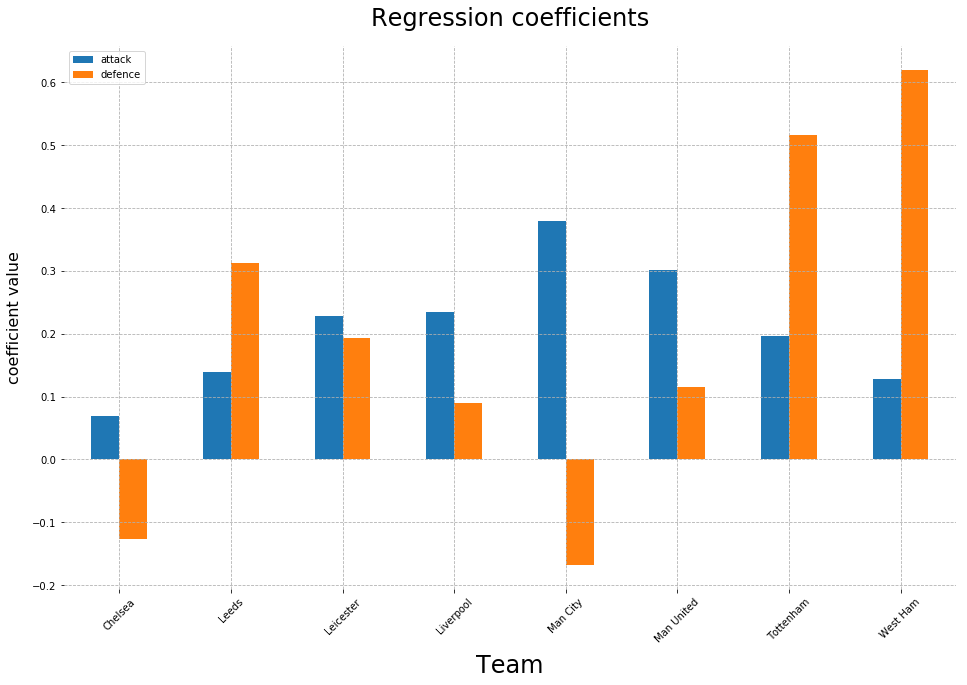

In [64]:
ax = df[df.team.isin(['Man City', 'Man United', 'Liverpool', 'Chelsea', 'Tottenham', 'Leicester', 'Leeds', 'West Ham'])].plot.bar(rot=45, figsize=(16, 10))
#set title and add grid
ax.set_title("Regression coefficients", fontsize = 24, pad=20)
ax.grid(linestyle = "--")
#disable spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#add axis labels
ax.set_ylabel('coefficient value', fontsize = 16,labelpad=10)
ax.set_xlabel('Team', fontsize = 24, labelpad=10);

In [279]:
# Set teams here
home_team='Chelsea'
away_team='Man City'

#Predict for Arsenal vs. Manchester City
home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team, 'xG': 2.1, 'shots': 14, 'shots_ot': 6, 'corners': 3, 'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team, 'xG': 1.1, 'shots': 7, 'shots_ot': 2, 'corners': 3, 'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

#Lets just get a result
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Chelsea against Man City expect to score: 1    1.308617
dtype: float64
Man City against Chelsea expect to score: 1    1.231462
dtype: float64
Chelsea: 2
Man City: 1


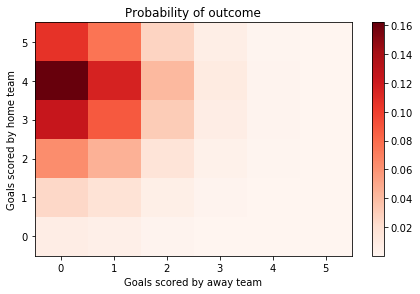

In [235]:
# Code to caluclate the goals for the match.
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 'opponent': awayTeam, 'xG': 1.1, 'shots': 6, 'shots_ot': 4, 'corners': 5, 'home':1},index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 'opponent': homeTeam, 'xG': 1.1, 'shots': 7, 'shots_ot': 2, 'corners': 3, 'home':0},index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
score_matrix=simulate_match(poisson_model, homeTeam='Man City', awayTeam='Chelsea', max_goals=5)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by away team')
ax.set_ylabel('Goals scored by home team')
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))

In [229]:
print(homewin, draw, awaywin)

0.5636530963013078 0.2576229994765685 0.1737292984282361
